In [25]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt

def energy(Lattice,L,w_AA,w_BB,w_AB):
# Functions to compute energy of a lattice
    E = 0
    for y in range(L):
        for x in range(L):
            N_A=0
            N_B=0
            #LOOK RIGHT
            if x == L-1:
                if Lattice[0,y] ==0:
                    N_A += 1
                else:
                    N_B += 1
            else:
                if Lattice[x+1,y] == 0:
                    N_A += 1
                else:
                    N_B += 1
            #LOOK LEFT
            if x == 0:
                if Lattice[L-1,y] ==0:
                    N_A += 1
                else:
                    N_B += 1
            else:
                if Lattice[x-1,y] == 0:
                    N_A += 1
                else:
                    N_B += 1
            #LOOK UP
            if y == 0:
                if Lattice[x,L-1] ==0:
                    N_A += 1
                else:
                    N_B += 1
            else:
                if Lattice[x,y-1] == 0:
                    N_A += 1
                else:
                    N_B += 1
            #LOOK DOWN
            if y == L-1:
                if Lattice[x,0] ==0:
                    N_A += 1
                else:
                    N_B += 1
            else:
                if Lattice[x,y+1] == 0:
                    N_A += 1
                else:
                    N_B += 1

            if Lattice[x,y] ==0: # Of Type B
                E += N_A*w_AA + N_B*w_BB
            else: # Of Type B
                E += N_A*w_AB + N_B*w_BB

    return E/2.0

def plot_lattice(lattice):
    plt.imshow(lattice)
    plt.show()

def proposal(Lattice,L):
    Lattice_copy=Lattice.copy()
    x1=np.random.randint(L)
    y1=np.random.randint(L)
    x2=np.random.randint(L)
    y2=np.random.randint(L)
    species_1=Lattice_copy[x1,y1]
    species_2=Lattice_copy[x2,y2]
    Lattice_copy[x1,y1]=species_2
    Lattice_copy[x2,y2]=species_1
    #print('Swaping ',x1,y1,species_1, " with ",x2,y2,species_2)
    return Lattice_copy


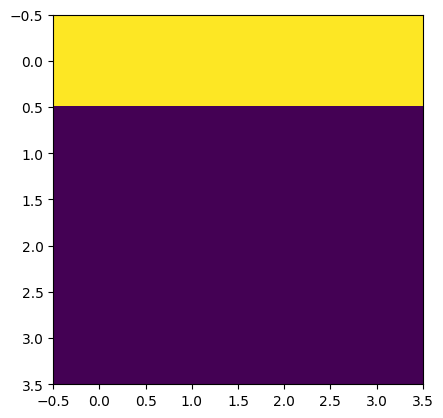

In [31]:
L = 4 #size of the lattice

Avo = 6.022E23 #Avogadros number
z   = 4    # Coordination number
k_b = 1.380649E-23*Avo  # Boltzmanns constant J/K/mol
T   = 300 # Temperature

x_A = 0.75        # Fraction of A
x_B = 1.0-x_A    # Fraction of B
w_AA=  0.0         # Interaction in J/mol
w_BB=  0.0         # Interaction in J/mol
w_AB= -1000.0        # Interaction in J/mol

#w_BW = w_aa+w_bb-2*w_ab For Bragg-Willaims comparison

Lattice = np.zeros( (L,L))    #0 = A, 1=B

counter =0
for i in range(L):
  for j in range(L):
    counter += 1
    if counter <= L*L*x_B:
        Lattice[i,j]=1.0

plot_lattice(Lattice)
#HER WE NEED TO FILL IN A AND B...

Initital energy: -4000.0


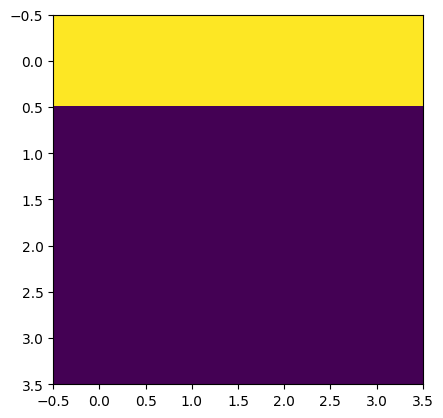

Step:  0  Energy:  -4000.0  Delta_energy:  0.0
Step:  1  Energy:  -5000.0  Delta_energy:  -1000.0
Step:  2  Energy:  -5000.0  Delta_energy:  0.0
Step:  3  Energy:  -5000.0  Delta_energy:  0.0
Step:  4  Energy:  -8000.0  Delta_energy:  -3000.0
Step:  5  Energy:  -8000.0  Delta_energy:  0.0
Step:  6  Energy:  -8000.0  Delta_energy:  0.0
Step:  7  Energy:  -8000.0  Delta_energy:  0.0
Step:  8  Energy:  -8000.0  Delta_energy:  1000.0
Step:  9  Energy:  -7000.0  Delta_energy:  1000.0
Step:  10  Energy:  -6000.0  Delta_energy:  1000.0
Step:  11  Energy:  -6000.0  Delta_energy:  0.0
Step:  12  Energy:  -5000.0  Delta_energy:  1000.0
Step:  13  Energy:  -5000.0  Delta_energy:  0.0
Step:  14  Energy:  -5000.0  Delta_energy:  0.0
Step:  15  Energy:  -5000.0  Delta_energy:  0.0
Step:  16  Energy:  -5000.0  Delta_energy:  0.0
Step:  17  Energy:  -5000.0  Delta_energy:  0.0
Step:  18  Energy:  -7000.0  Delta_energy:  -2000.0
Step:  19  Energy:  -7000.0  Delta_energy:  0.0
Step:  20  Energy:  -7000.

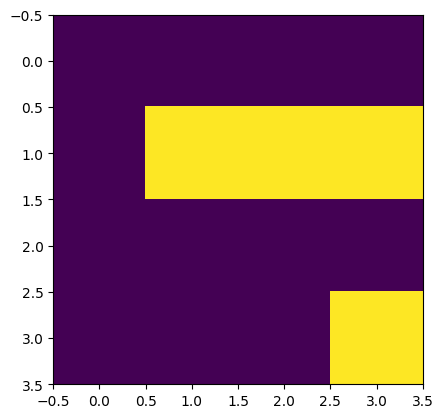

In [32]:
number_of_steps= 1000

ensamble=[]
energies=[]

E_old = energy(Lattice,L,w_AA,w_BB,w_AB)
Lattice_old=Lattice

print('Initital energy:', E_old)

plot_lattice(Lattice_old)

for steps in range(number_of_steps):
    Lattice_new=proposal(Lattice_old,L)
    E_new=energy(Lattice_new,L,w_AA,w_BB,w_AB)
    delta_E=E_new-E_old

    if delta_E < 0:
        E_old=E_new
        Lattice_old=Lattice_new
    else:
        probability=np.exp( -delta_E/(T*k_b)  )
        gamma=np.random.random()
        if gamma < probability:
            E_old=E_new
            Lattice_old=Lattice_new
        else:
            pass

    energies.append(E_old)
    print('Step: ',steps," Energy: ",E_old, " Delta_energy: ",delta_E)

plot_lattice(Lattice_old)

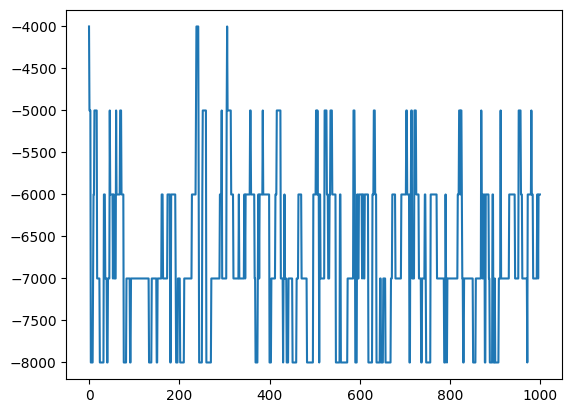

In [33]:
plt.plot(energies)

In [35]:
print("Predicted energy: ",np.array(energies).mean(),"for x_A:",x_A)

Predicted energy:  -6748.0 for x_A: 0.75
